<a href="https://colab.research.google.com/github/labonisarkar/IoT/blob/master/IoTNoteBook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Colab library to upload files to notebook
!wget https://github.com/labonisarkar/IoT/raw/master/data/mainSimulationAccessTraces.zip

--2020-04-17 15:31:45--  https://github.com/labonisarkar/IoT/raw/master/data/mainSimulationAccessTraces.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/labonisarkar/IoT/master/data/mainSimulationAccessTraces.zip [following]
--2020-04-17 15:31:46--  https://raw.githubusercontent.com/labonisarkar/IoT/master/data/mainSimulationAccessTraces.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4424482 (4.2M) [application/zip]
Saving to: ‘mainSimulationAccessTraces.zip.1’

mainSimulationAcces 100%[===================>]   4.22M  17.3MB/s    in 0.2s    

2020-04-17 15:31:46 (17.3 MB/s) - ‘mainSimulationAc

In [2]:
!unzip mainSimulationAccessTraces.zip

Archive:  mainSimulationAccessTraces.zip
replace mainSimulationAccessTraces.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: mainSimulationAccessTraces.csv  


# Importing Libraries

In [3]:
import matplotlib.pyplot as plt # Library for Data Visulization
import pandas as pd # Library for DataFrame 
import seaborn as sns #For Data Visulization

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
iot = pd.read_csv('mainSimulationAccessTraces.csv')

# Data PreProcessing
### Change the name of Iot Lables in Simpler form
Example: anomalous(DoSattack)  ---> DoS Attack

In [5]:
iot['normality'].value_counts()

normal                           347935
anomalous(DoSattack)               5780
anomalous(scan)                    1547
anomalous(malitiousControl)         889
anomalous(malitiousOperation)       805
anomalous(spying)                   532
anomalous(dataProbing)              342
anomalous(wrongSetUp)               122
Name: normality, dtype: int64

In [0]:
normality = iot['normality'].map({'normal': 'Normal', 'anomalous(DoSattack)':'DoS Attack', 'anomalous(scan)':'Scan',
       'anomalous(malitiousControl)':'Malitious Control', 'anomalous(malitiousOperation)' : 'Malitious Operation',
       'anomalous(spying)':'Spying', 'anomalous(dataProbing)':'Data Probing', 'anomalous(wrongSetUp)':'Wrong SetUp'})


In [7]:
iot['normality'] = normality
iot['normality'].value_counts()

Normal                 347935
DoS Attack               5780
Scan                     1547
Malitious Control         889
Malitious Operation       805
Spying                    532
Data Probing              342
Wrong SetUp               122
Name: normality, dtype: int64

# Visualize Missing Values
The Missing values are shown in block for all the column in the plot

sourceID                        0
sourceAddress                   0
sourceType                      0
sourceLocation                  0
destinationServiceAddress       0
destinationServiceType          0
destinationLocation             0
accessedNodeAddress             0
accessedNodeType              148
operation                       0
value                        2050
timestamp                       0
normality                       0
dtype: int64


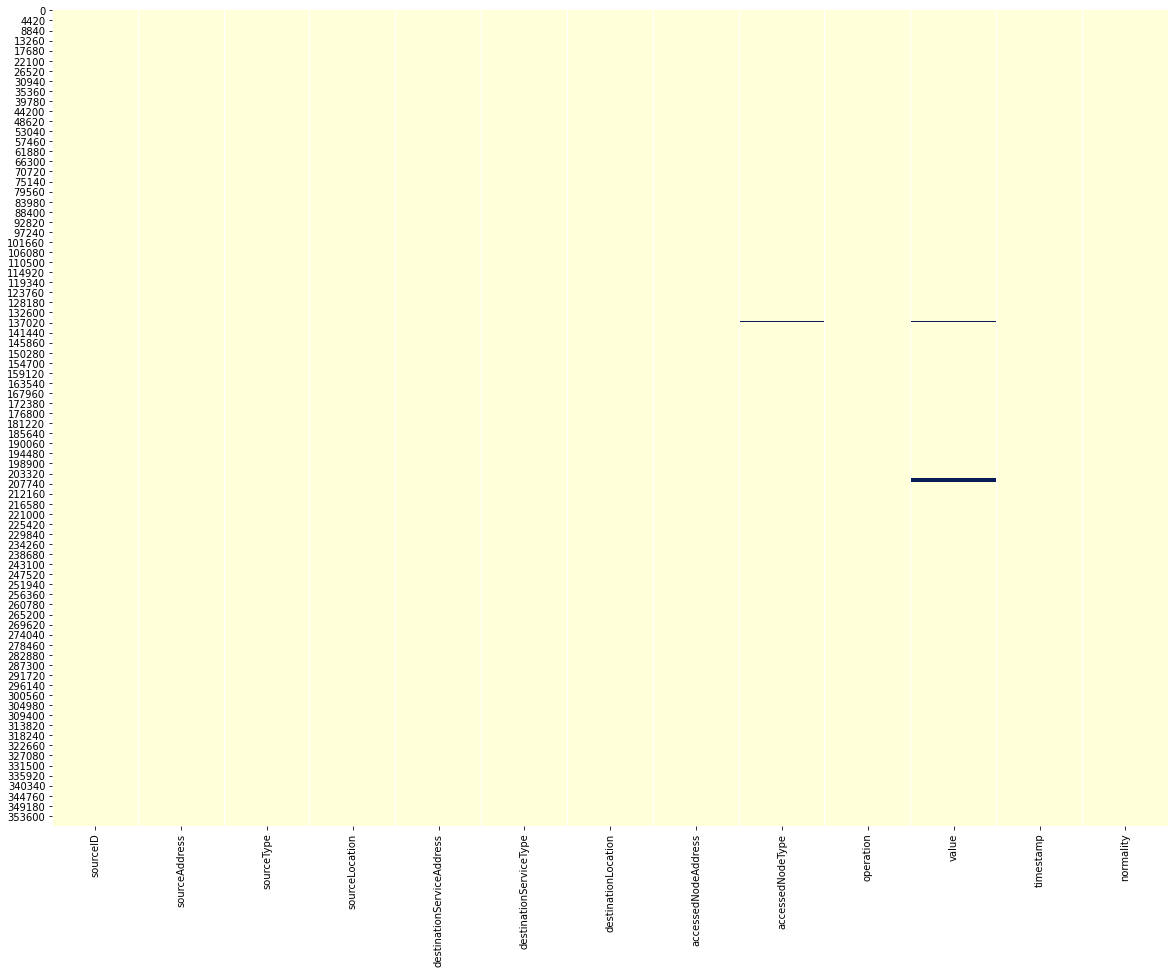

In [8]:
#Visualize Missing Values
plt.subplots(figsize=(20,15))
sns.heatmap(iot.isnull(), cbar=False, cmap="YlGnBu")
print(iot.isnull().sum())

In [9]:
iot.isnull().sum()

sourceID                        0
sourceAddress                   0
sourceType                      0
sourceLocation                  0
destinationServiceAddress       0
destinationServiceType          0
destinationLocation             0
accessedNodeAddress             0
accessedNodeType              148
operation                       0
value                        2050
timestamp                       0
normality                       0
dtype: int64

# comment
- The Result shows The Columns **Values** and **accessedNodeType** have 2050 and 148 missing values
- The missing values are then replaced by fill forword method for values and accessedNodeType with '/Unknown'

sourceID                     0
sourceAddress                0
sourceType                   0
sourceLocation               0
destinationServiceAddress    0
destinationServiceType       0
destinationLocation          0
accessedNodeAddress          0
accessedNodeType             0
operation                    0
value                        0
timestamp                    0
normality                    0
dtype: int64


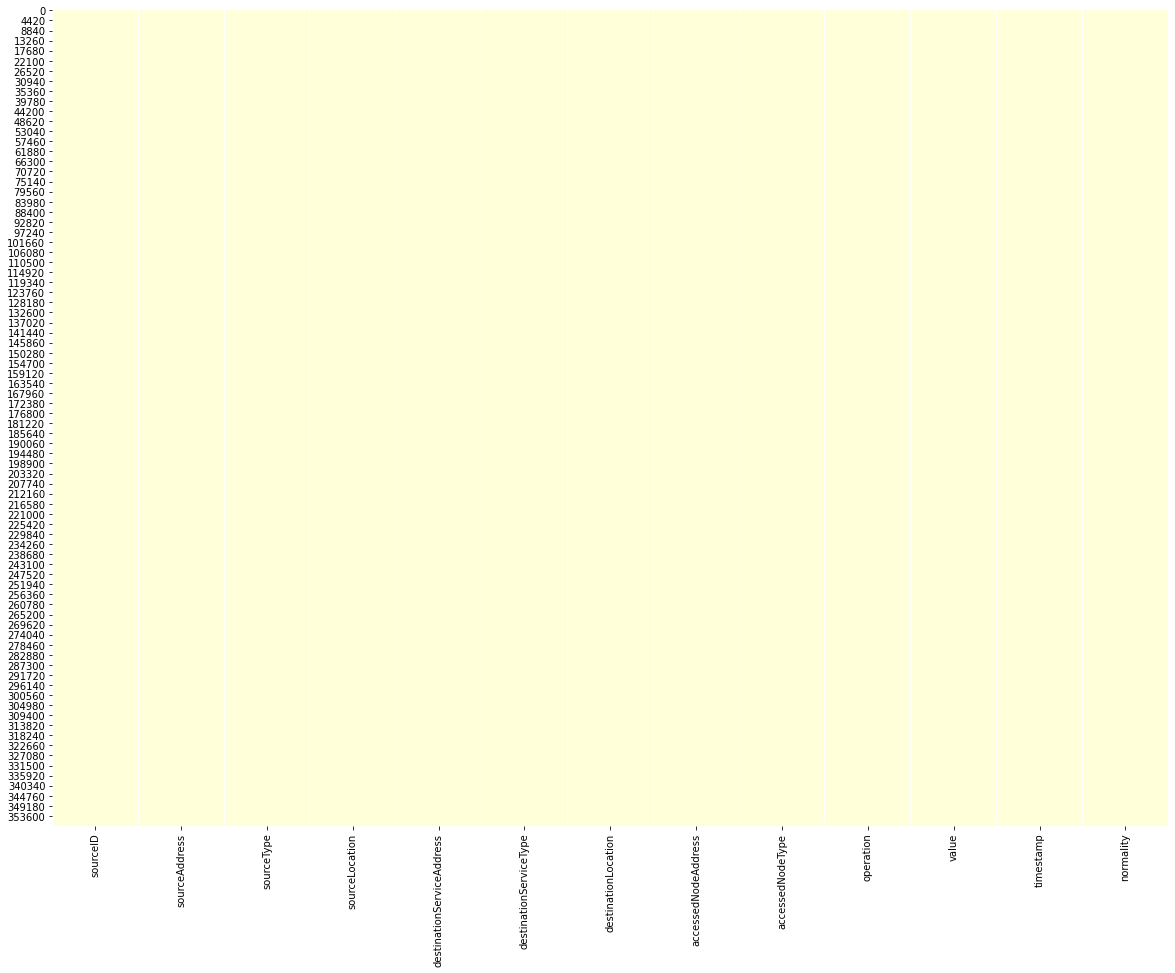

In [10]:

iot['value'].fillna( method ='ffill', inplace = True) 
iot['accessedNodeType'] = iot['accessedNodeType'].fillna(value='/Unknown')

#Visualize Missing Values
plt.subplots(figsize=(20,15))
sns.heatmap(iot.isnull(), cbar=False, cmap="YlGnBu")
print(iot.isnull().sum())

# Ploting the Type of Attacks

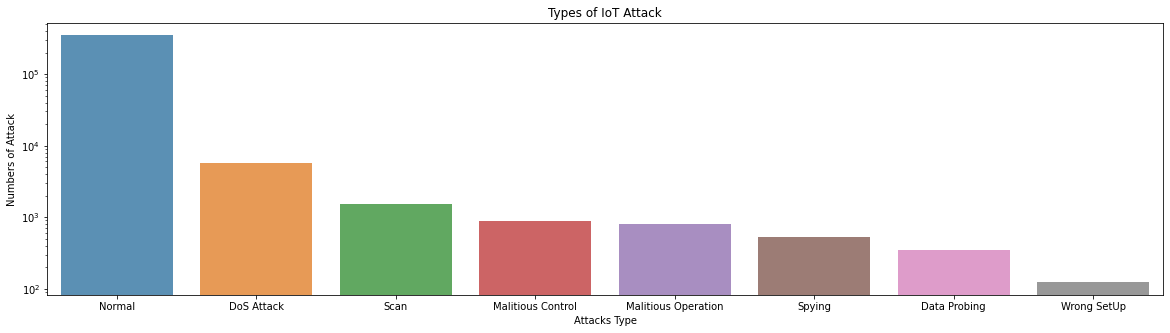

In [11]:
#ploting the bar graph of Types of 
plt.figure(figsize=(20,5))
attack_count = iot['normality'].value_counts()
g = sns.barplot(attack_count.index,attack_count.values,alpha=0.8)
g.set_yscale("log")
plt.title('Types of IoT Attack')
plt.xlabel('Attacks Type')
plt.ylabel('Numbers of Attack')
plt.show()

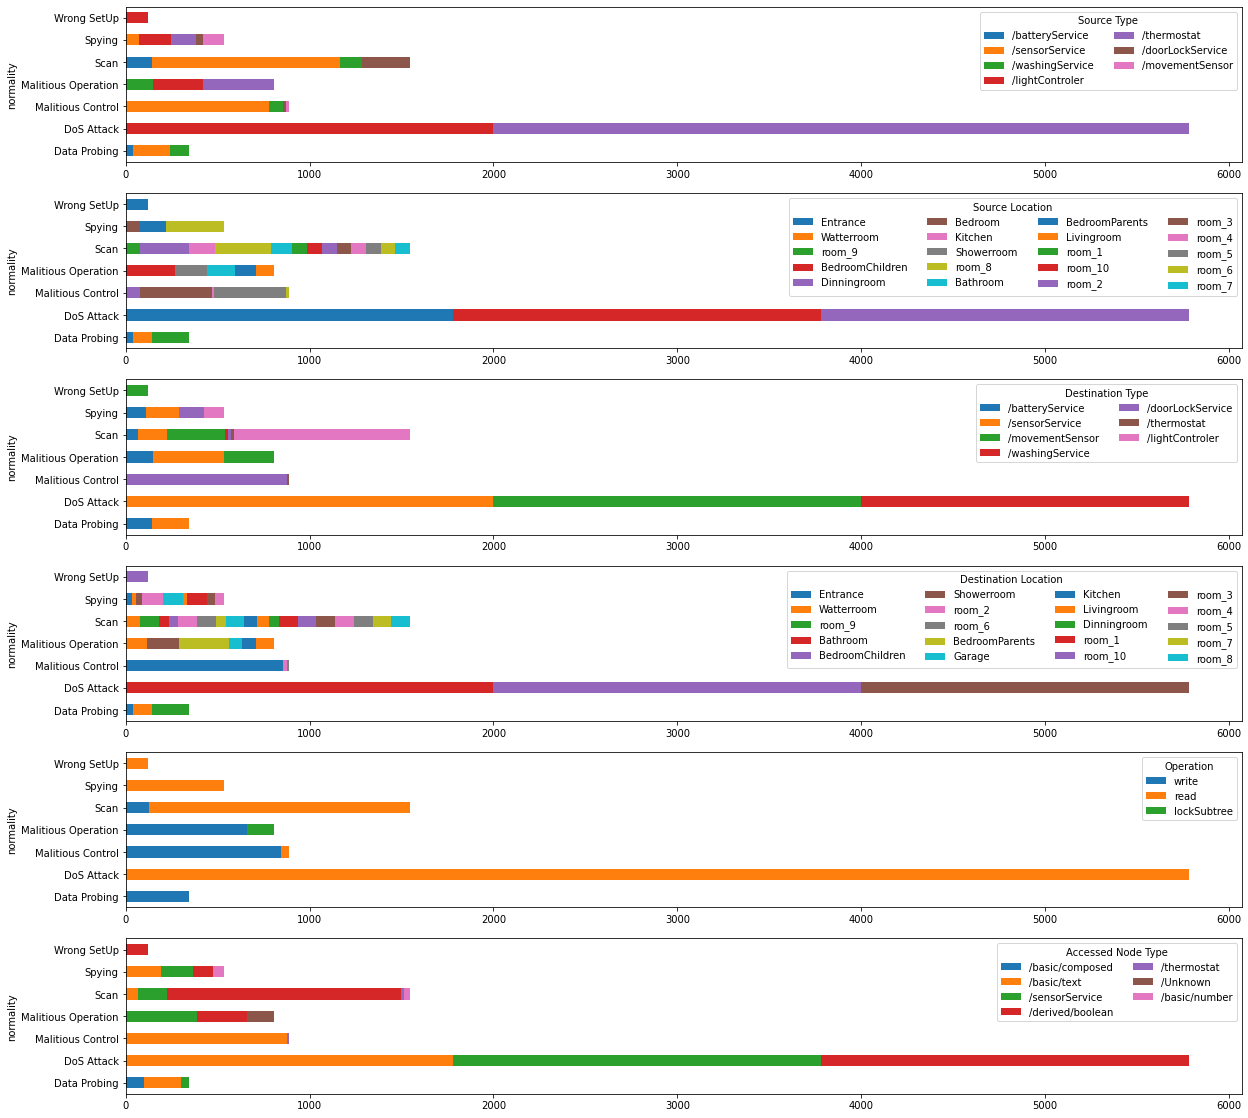

In [12]:

fig = plt.figure()

# Divide the figure into a 4x1 grid, and give me the first section
ax1 = fig.add_subplot(611)

# Divide the figure into a 4x1 grid, and give me the second section
ax2 = fig.add_subplot(612)

# Divide the figure into a 4x1 grid, and give me the first section
ax3 = fig.add_subplot(613)

# Divide the figure into a 4x1 grid, and give me the second section
ax4 = fig.add_subplot(614)

# Divide the figure into a 4x1 grid, and give me the first section
ax5 = fig.add_subplot(615)

# Divide the figure into a 4x1 grid, and give me the second section
ax6 = fig.add_subplot(616)


iot.groupby(['normality','sourceType'])['value'].count().drop(['Normal']).unstack().plot(kind='barh',stacked=True,figsize=(20,20),ax=ax1)
iot.groupby(['normality','sourceLocation'])['value'].count().drop(['Normal']).unstack().plot(kind='barh',stacked=True,figsize=(20,20),ax=ax2)
iot.groupby(['normality','destinationServiceType'])['value'].count().drop(['Normal']).unstack().plot(kind='barh',stacked=True,figsize=(20,20),ax=ax3)
iot.groupby(['normality','destinationLocation'])['value'].count().drop(['Normal']).unstack().plot(kind='barh',stacked=True,figsize=(20,20),ax=ax4)
iot.groupby(['normality','operation'])['value'].count().drop(['Normal']).unstack().plot(kind='barh',stacked=True,figsize=(20,20),ax=ax5)
iot.groupby(['normality','accessedNodeType'])['value'].count().drop(['Normal']).unstack().plot(kind='barh',stacked=True,figsize=(20,20),ax=ax6)
ax1.legend(ncol=2,title='Source Type')
ax2.legend(ncol=4,title='Source Location')
ax3.legend(ncol=2,title='Destination Type')
ax4.legend(ncol=4,title='Destination Location')
ax5.legend(title='Operation')
ax6.legend(ncol=2,title='Accessed Node Type')

# Data Pre Processing
- The Value Columns show some anomalies in the data, The next steps we cleans the valus data and replace
- Example : none to 0 , false to 0 , true to 1 , twenty to 20
- Next we change the data type with string to numaric 

In [13]:
iot[['value']][iot['value'].str.isalnum()]['value'].value_counts()

1         57066
0         50293
false     25974
true      14540
7         10038
10         9636
6          8540
5          8494
2          8444
4          8437
9          8433
8          8430
3          8428
twenty      200
none        106
Name: value, dtype: int64

In [0]:
#Map the Non-Numeric Value to Corresponding values
value_map = {'none':'0','false':'0','true':'1','twenty':'20'}
iot['value'] = iot['value'].map(value_map).fillna(iot['value'])

In [0]:
# covert the data values to numeric
iot['value'] = pd.to_numeric(iot['value'], errors='coerce')

In [16]:
print(iot.isnull().sum())

sourceID                      0
sourceAddress                 0
sourceType                    0
sourceLocation                0
destinationServiceAddress     0
destinationServiceType        0
destinationLocation           0
accessedNodeAddress           0
accessedNodeType              0
operation                     0
value                        11
timestamp                     0
normality                     0
dtype: int64


In [17]:
iot.dropna(inplace=True)
print(iot.isnull().sum())

sourceID                     0
sourceAddress                0
sourceType                   0
sourceLocation               0
destinationServiceAddress    0
destinationServiceType       0
destinationLocation          0
accessedNodeAddress          0
accessedNodeType             0
operation                    0
value                        0
timestamp                    0
normality                    0
dtype: int64


## Feature Genaration

In [0]:
#Conver columns to type to category
def to_category(dataframe,columns=[],type = 'None'):
    if type == 'object':
        columns = list(dataframe.select_dtypes(type).dtypes.index)        
    return dataframe[columns].apply(lambda x: x.astype('category'))

# Function OneHot Coding:
def convert_to_onehot(dataframe,feature_list,drop_first=True):
    """Covert all columns in the list using One Hot Method"""
    res = pd.DataFrame(index=dataframe.index)
    for feature in feature_list:
        dummies = pd.get_dummies(dataframe[[feature]])
        res = pd.concat([res,dummies],axis=1)
    if not drop_first:
        res = pd.concat([dataframe,res],axis=1)
    return res


#label Encoder for categorical data
def label_encoder(dataframe,columns,drop_first=True,prefix='_label'):
    """convert categorical data with label encoder"""
    from sklearn.preprocessing import LabelEncoder
    res = pd.DataFrame(index=dataframe.index)
    for col in columns:
        # creating instance of labelencoder
        labelencoder = LabelEncoder()
        res[col+prefix] = labelencoder.fit_transform(dataframe[col])
    if not drop_first:
        res = pd.concat([dataframe,res],axis=1)
    return res

In [19]:
iot.dtypes

sourceID                      object
sourceAddress                 object
sourceType                    object
sourceLocation                object
destinationServiceAddress     object
destinationServiceType        object
destinationLocation           object
accessedNodeAddress           object
accessedNodeType              object
operation                     object
value                        float64
timestamp                      int64
normality                     object
dtype: object

In [20]:
columns = to_category(iot,type = 'object').columns
iot[columns] = to_category(iot,type = 'object')
iot.dtypes

sourceID                     category
sourceAddress                category
sourceType                   category
sourceLocation               category
destinationServiceAddress    category
destinationServiceType       category
destinationLocation          category
accessedNodeAddress          category
accessedNodeType             category
operation                    category
value                         float64
timestamp                       int64
normality                    category
dtype: object

In [21]:
iot.describe()

,value,timestamp
count,3.579410e+05,3.579410e+05
mean,2.447954e+09,1.520078e+12
std,6.097456e+10,2.465573e+07
min,0.000000e+00,1.520032e+12
25%,1.000000e+00,1.520057e+12
50%,5.000000e+00,1.520080e+12
75%,1.982230e+01,1.520099e+12
max,1.521225e+12,1.520118e+12


In [22]:
iot.select_dtypes('category').describe()

,sourceID,sourceAddress,sourceType,sourceLocation,destinationServiceAddress,destinationServiceType,destinationLocation,accessedNodeAddress,accessedNodeType,operation,normality
count,357941,357941,357941,357941,357941,357941,357941,357941,357941,357941,357941
unique,84,89,8,21,85,8,21,170,13,4,8
top,washingmachine1,/agent6/washingmachine1,/lightControler,Garage,/agent11/battery4,/sensorService,Garage,/agent11/battery4/charge,/sensorService,read,Normal
freq,17908,17908,135775,39499,27643,130313,57100,19031,130155,248061,347924


In [0]:
#unique_values = iot.select_dtypes('category').describe().loc['unique',:].to_frame()
#label_col = unique_values[unique_values > 21].dropna().index
#hot_col = unique_values[unique_values <= 21].dropna().index

iot_feature_col = ['sourceType', 'sourceLocation', 'destinationServiceType', 'destinationLocation', 'accessedNodeType', 'operation','sourceID', 'sourceAddress', 'destinationServiceAddress', 'accessedNodeAddress']
target = ['normality']

In [0]:
iot.drop('timestamp',axis=1,inplace=True)

In [0]:
iot_feature = pd.concat([label_encoder(iot,iot_feature_col),iot[['value']]],axis=1)

In [26]:
iot_feature.shape

(357941, 11)

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(iot_feature)

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(iot['normality'].values).reshape(-1,1)

# Machine Learning

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
report = {}

In [0]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 123)

# K Nearest Neighbor(KNN)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 8)
knn

knn.fit(X_train,y_train.ravel())
y_pred  = knn.predict(X_test)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred,average='weighted')))
print('Recall Score : ' + str(recall_score(y_test,y_pred,average='weighted')))
print('F1 Score : ' + str(f1_score(y_test,y_pred,average='weighted')))

Accuracy Score : 0.99384446327631
Precision Score : 0.9955545112703945
Recall Score : 0.99384446327631
F1 Score : 0.994331517091249


# Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion="entropy", max_depth = 10)
tree.fit(X_train,y_train)
y_pred  = tree.predict(X_test)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred,average='weighted')))
print('Recall Score : ' + str(recall_score(y_test,y_pred,average='weighted')))
print('F1 Score : ' + str(f1_score(y_test,y_pred,average='weighted')))

Accuracy Score : 0.9940865872624158
Precision Score : 0.993991705237306
Recall Score : 0.9940865872624158
F1 Score : 0.9934829055703668


## Support Vector Machine

In [32]:
from sklearn import svm
clf = svm.SVC(kernel='poly')
clf.fit(X_train, y_train.ravel()) 
y_pred = clf.predict(X_test)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred,average='weighted')))
print('Recall Score : ' + str(recall_score(y_test,y_pred,average='weighted')))
print('F1 Score : ' + str(f1_score(y_test,y_pred,average='weighted')))

Accuracy Score : 0.993704776361249
Precision Score : 0.9936142854498599
Recall Score : 0.993704776361249
F1 Score : 0.9930947360355183
